<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/thebootstraplab_ellathomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 5.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Question 2**

In [3]:
df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

In [4]:
(df).head(5)

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


Part a

In [5]:
pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, margins_name="Total")

breast_cancer_death,no,yes,Total
treatment,,,
control,44405,505,44910
mammogram,44425,500,44925
Total,88830,1005,89835


There is not a huge difference in in 25-year survival rates between the control and mammogram groups?There are a few more no's for mammogram and a few more yes's for control.

Part b

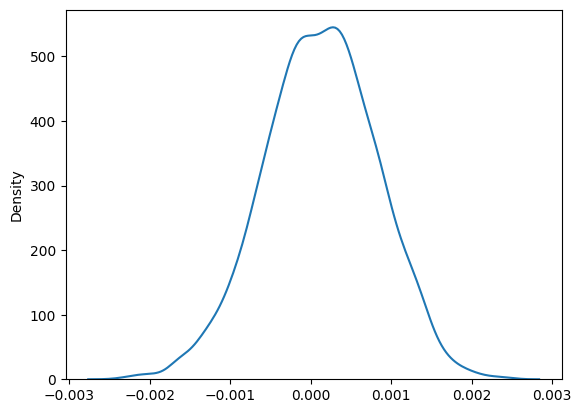

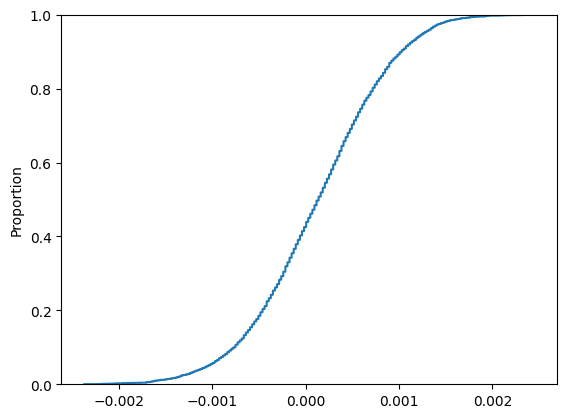

In [6]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

Part c

In [7]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% CI: (', lower_bound, ', ', upper_bound, ')' )

99% CI: ( -0.0017105999422328444 ,  0.0018519828750433814 )


This interval does include 0, so there is not a statistically significant difference between these two groups.

Part d

If it is true that wealthier individuals are more likely to get a mammogram, and that wealthier people generally have better health (because they have more time to workout, less stress from money, access to healthier foods, etc.) then the prevalence of breast cancer might be lower in the treatment group than the control group, making it appear that mammograms aren't useful.

Additionally, it may be interesting to look at some additional information for specific patients within this data. It is possible that mammogram treatment is effective for certain subpopulations (maybe extremely at risk groups), but is ineffective overall.


**Question 3**

In [8]:
df2 = pd.read_csv("/content/the_bootstrap/data/diabetes_hw.csv")

In [9]:
df2.head(5)

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [10]:
df2['success'] = 0
df2.loc[df2['outcome']=='success','success'] = 1

In [11]:
df2.head(5)

,Unnamed: 0,treatment,outcome,success
0,1,met,success,1
1,2,rosi,failure,0
2,3,rosi,success,1
3,4,lifestyle,success,1
4,5,met,success,1


Part a

In [14]:
pd.crosstab(df2['treatment'], df2['outcome'], margins=True, margins_name="Total")

outcome,failure,success,Total
treatment,,,
lifestyle,109,125,234
met,120,112,232
rosi,90,143,233
Total,319,380,699


Part b

In [16]:
print('Lifestyle Success Rate: ', 125/(125+109), '\n')
print('Met Success Rate: ', 112/(112+120), '\n')
print('Rosi Success Rate: ', 143/(143+90), '\n')

Lifestyle Success Rate:  0.5341880341880342 

Met Success Rate:  0.4827586206896552 

Rosi Success Rate:  0.6137339055793991 



The Rosi treatment has the highest success rate, and therefore appears to be the most effective. Rosi is followed by lifestyle, then met.

Part c

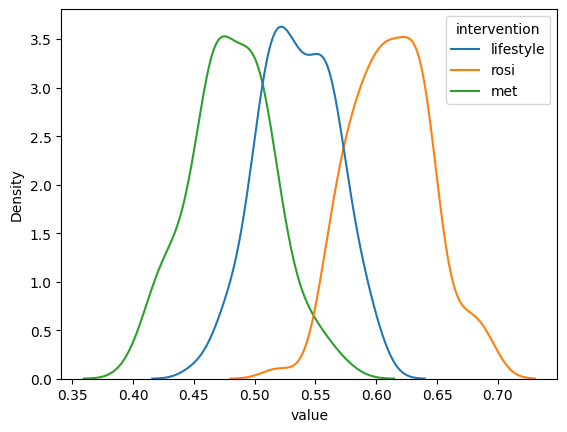

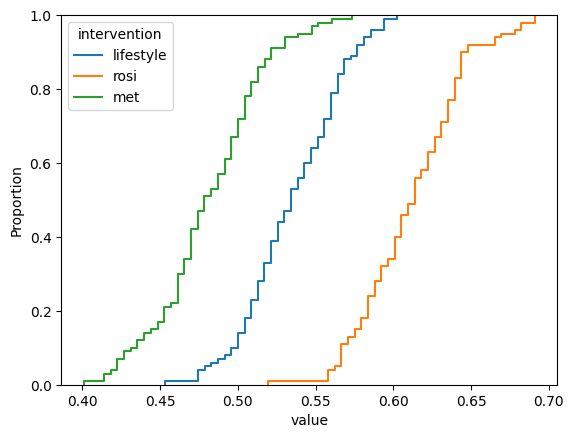

In [17]:
df_lif = df2.loc[ df2['treatment'] == 'lifestyle', :]
df_ros = df2.loc[ df2['treatment'] == 'rosi', :]
df_met = df2.loc[ df2['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)

    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])

    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

The rosi treatment group still appears to be the most effective because it has the overall highest "success" based on our bootstrapped sample.

Part d

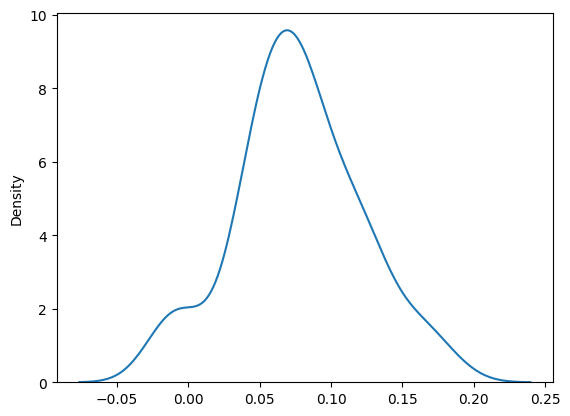

90% Confidence interval, rosi minus lifestyle:  -0.006145225780418861 ,  0.15667987234510838


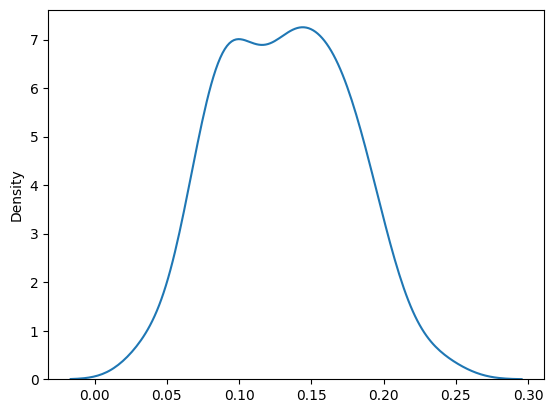

90% Confidence interval, rosi minus metformin:  0.07030394405801392 ,  0.19988622909575257


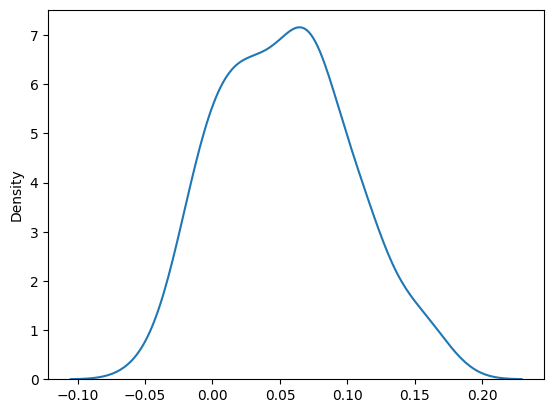

90% Confidence interval, lifestyle minus metformin:  -0.012938402593575055 ,  0.13772656940760383


In [19]:
rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

The difference between rosi and metformin is significantly different, as 0 is not included in thsi confidence interval.

Part e

Honestly, it depends. It is likely safer to use lifestyle, as it is hard to say what the longterm effects of using drugs to control diabetes are. If a person can use likestyle to combat diabetes, this is probably preferred. If lifestyle fails, it appears as though Rosi is better than Met for controling diabetes.